# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Menggunakan Dataset **Beverage Sales**

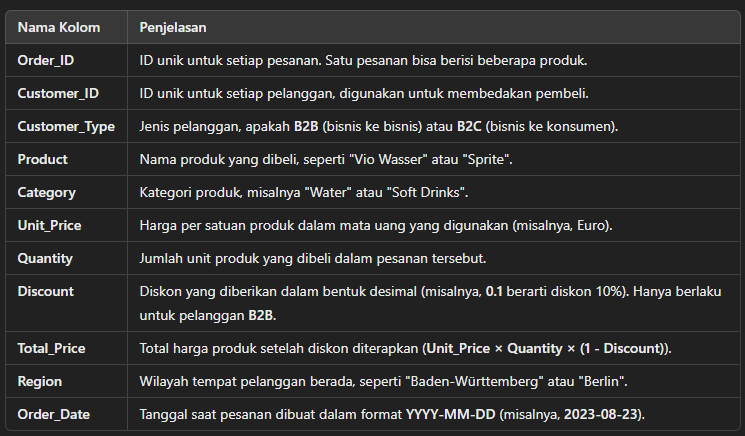

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#Import Semua Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [1328]:
df = pd.read_csv('Dataset_clustering.csv')

In [1329]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data

In [1330]:
# ---
# 1. Memahami Struktur Data
# ---
print(f"Baris x Kolom : {df.shape}\n")
print(f"Data Info : \n{df.dtypes}")

Baris x Kolom : (8999910, 11)

Data Info : 
Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object


In [ ]:
# untuk mempercepat proses pengerjaan hanya diambil 200k dari data
stateRandom = 65
df_sample = df.copy().sample(n=200000, random_state=stateRandom)
df_sample.info()
df_sample.shape

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 120824 to 5618783
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       200000 non-null  object 
 1   Customer_ID    200000 non-null  object 
 2   Customer_Type  200000 non-null  object 
 3   Product        200000 non-null  object 
 4   Category       200000 non-null  object 
 5   Unit_Price     200000 non-null  float64
 6   Quantity       200000 non-null  int64  
 7   Discount       200000 non-null  float64
 8   Total_Price    200000 non-null  float64
 9   Region         200000 non-null  object 
 10  Order_Date     200000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 18.3+ MB


(200000, 11)

**Summary :**
- Terdapat 11 kolom
- Terdapat 8.999.910 (8jt++)
- Ubah Tipe Data Pada kolom `Order_date` menjadi `datetime`
- Dikarenakan datanya 8jt lebih. Maka akan di ambil 25% dari total data

## 2. Menangani Data yang Hilang

In [1332]:
# ---
# 2. Menangani Data yang Hilang
# ---
print(f"Data Hilang : \n{df_sample.isnull().sum()}")
print(f"\nDuplikat : {df_sample.duplicated().sum()}")

Data Hilang : 
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

Duplikat : 0


**Summary :**

Tidak ada data yang hilang dan duplikat

## 3. Analisis Distribusi dan Korelasi

Deskripsi Statistik : 
          Unit_Price       Quantity       Discount    Total_Price
count  200000.000000  200000.000000  200000.000000  200000.000000
mean        5.807697      23.184140       0.029732     129.775095
std        14.684426      26.936109       0.044755     501.546911
min         0.320000       1.000000       0.000000       0.300000
25%         1.050000       6.000000       0.000000       8.377500
50%         1.750000      11.000000       0.000000      21.140000
75%         3.200000      31.000000       0.050000      69.415000
max       156.330000     100.000000       0.150000   12369.170000


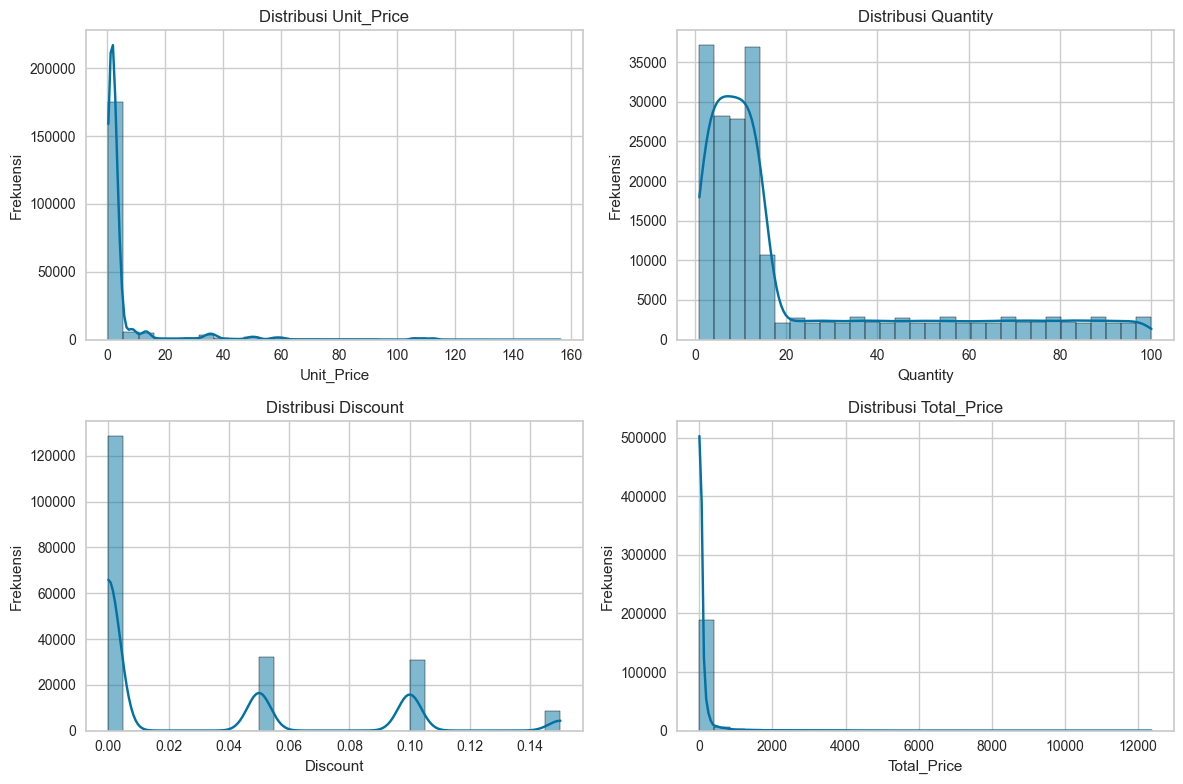

In [1333]:
# ---
# 3. Analisis Distribusi dan Korelasi
# ---

# Statistik Deskriptif
print(f"Deskripsi Statistik : \n{df_sample.describe()}")

# List kolom numerik yang ingin divisualkan
kolom_numerik = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

# Plot histogram untuk setiap kolom
plt.figure(figsize=(12, 8))
for i, col in enumerate(kolom_numerik, 1):  # enumerate untuk membuat nomor urut
  plt.subplot(2, 2, i)  # Membuat layout gird 2x2
  plt.title(f'Distribusi {col}')
  plt.xlabel(col)
  plt.ylabel('Frekuensi')
  
  sns.histplot(df_sample[col], kde=True, bins=30) # Membuat histogram

plt.tight_layout() # mengatur layout 
plt.show()

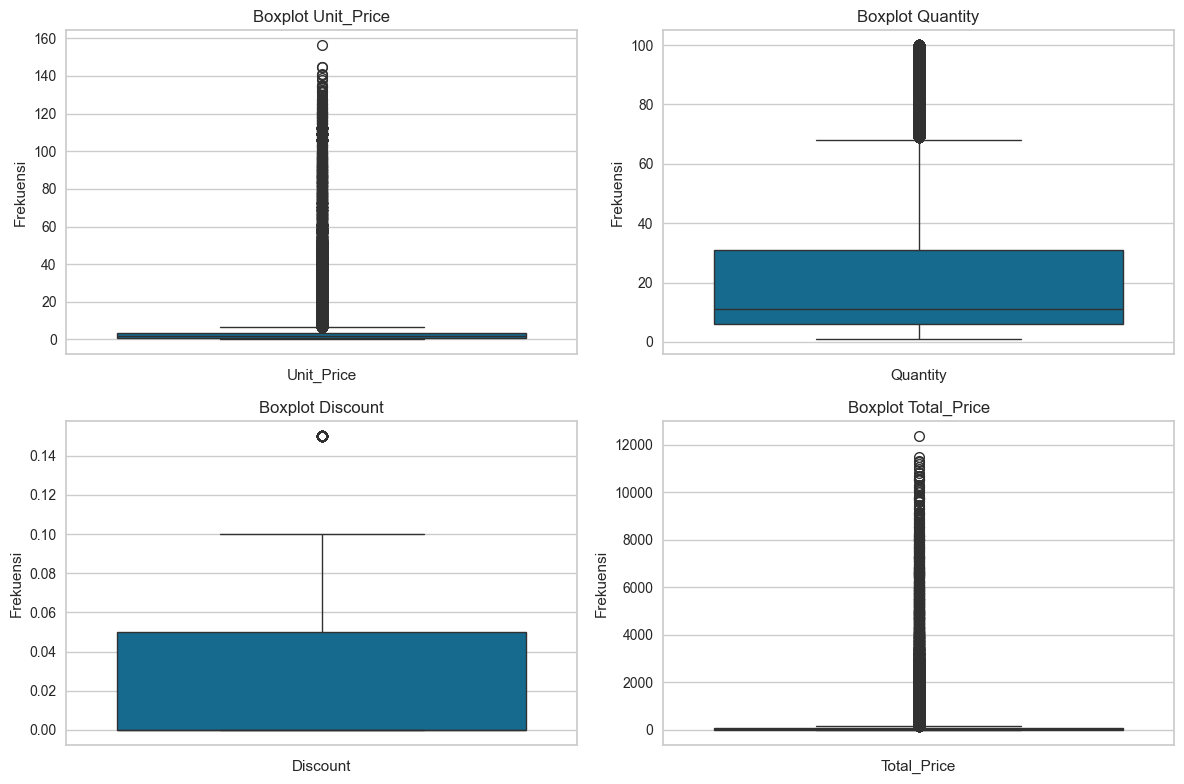

In [1334]:
# Melihat Outliers
# perulangan untuk membuat figure sesuai jumlah variabel numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(kolom_numerik, 1):
  plt.subplot(2, 2, i)
  sns.boxplot(df_sample[col])
  plt.title(f'Boxplot {col}')
  plt.xlabel(col)
  plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Korelasi : 
             Unit_Price  Quantity  Discount  Total_Price
Unit_Price     1.000000  0.014396  0.001762     0.620485
Quantity       0.014396  1.000000  0.823108     0.312105
Discount       0.001762  0.823108  1.000000     0.248074
Total_Price    0.620485  0.312105  0.248074     1.000000


<Axes: >

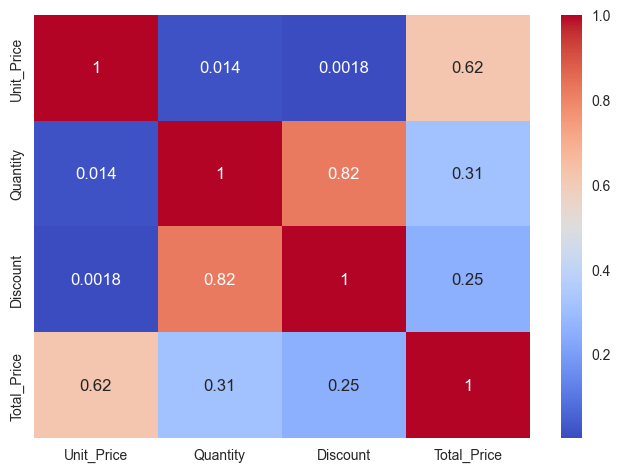

In [1335]:
korelasi = df_sample[kolom_numerik].corr()
print(f"Korelasi : \n{korelasi}")

sns.heatmap(korelasi, annot=True, cmap='coolwarm')

## 4. Visualisasi Data

In [1336]:
# ---
# 4. Visualisasi Data
# ---

# Buat DataFrame dari value_counts
def create_count_df(column):
  counts = df_sample[column].value_counts()
  percent = df_sample[column].value_counts(normalize=True) * 100
  return pd.DataFrame({
    'Jumlah': counts,
    'Persentase (%)': percent.round(1)
  })

distribusi_kategori = create_count_df('Category')
distribusi_tipe_pelanggan = create_count_df('Customer_Type')
distribusi_region = create_count_df('Region')
distribusi_produk = create_count_df('Product')


---> DISTRIBUSI KATEGORI PRODUK <---


,Jumlah,Persentase (%)
Category,,
Alcoholic Beverages,50071,25.0
Water,50056,25.0
Soft Drinks,49967,25.0
Juices,49906,25.0


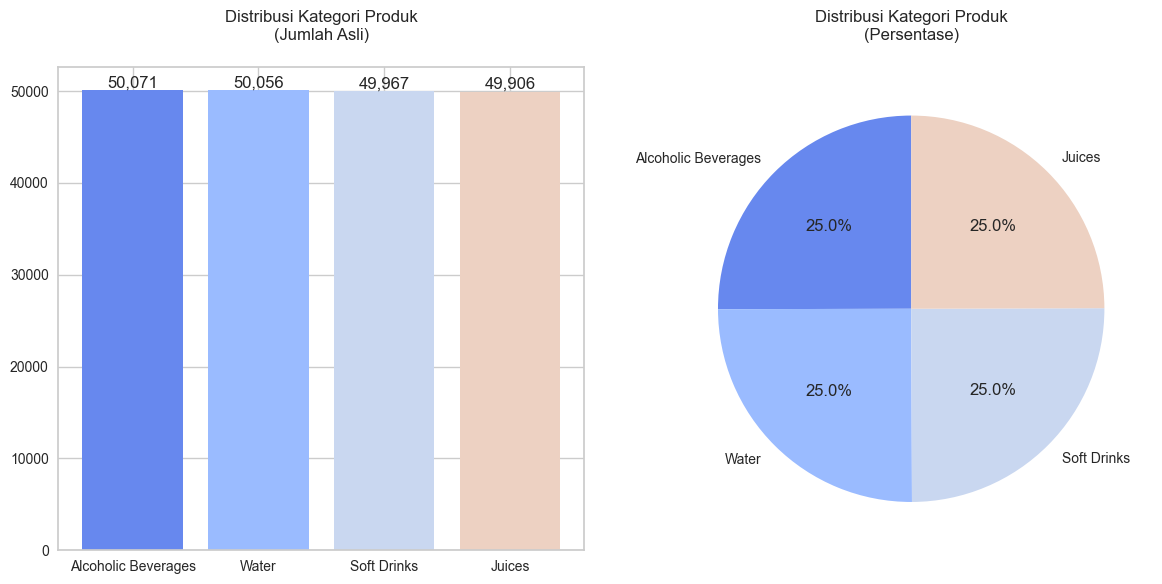


---> DISTRIBUSI TIPE PELANGGAN <---


,Jumlah,Persentase (%)
Customer_Type,,
B2C,128674,64.3
B2B,71326,35.7


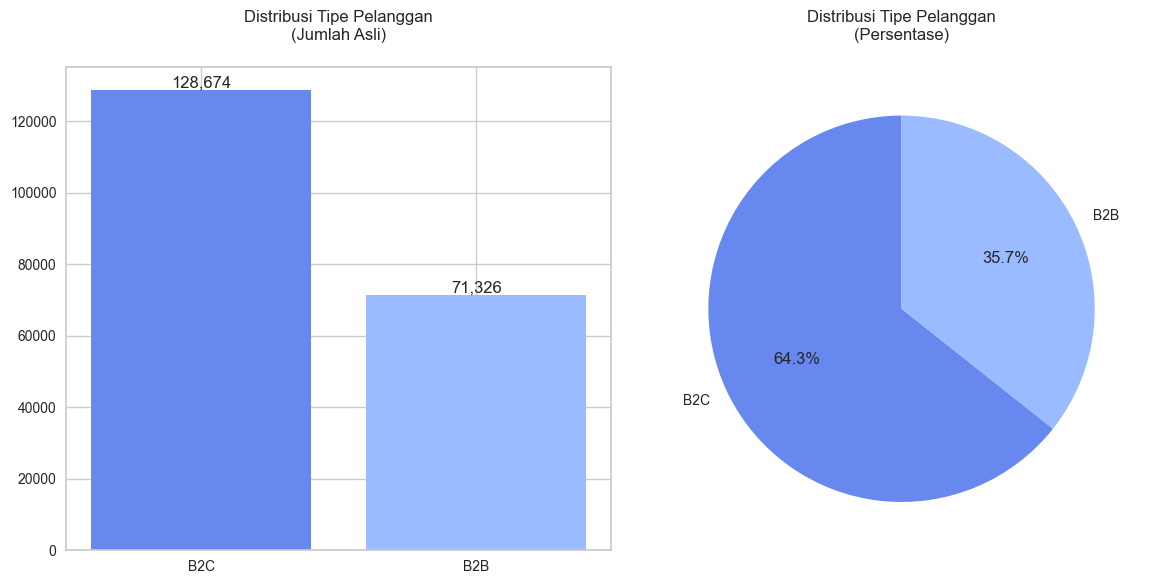


---> DISTRIBUSI REGION <---


,Jumlah,Persentase (%)
Region,,
Hamburg,13569,6.8
Niedersachsen,12913,6.5
Rheinland-Pfalz,12865,6.4
Saarland,12740,6.4
Sachsen,12652,6.3
Schleswig-Holstein,12578,6.3
Baden-Württemberg,12514,6.3
Thüringen,12509,6.3
Nordrhein-Westfalen,12499,6.2


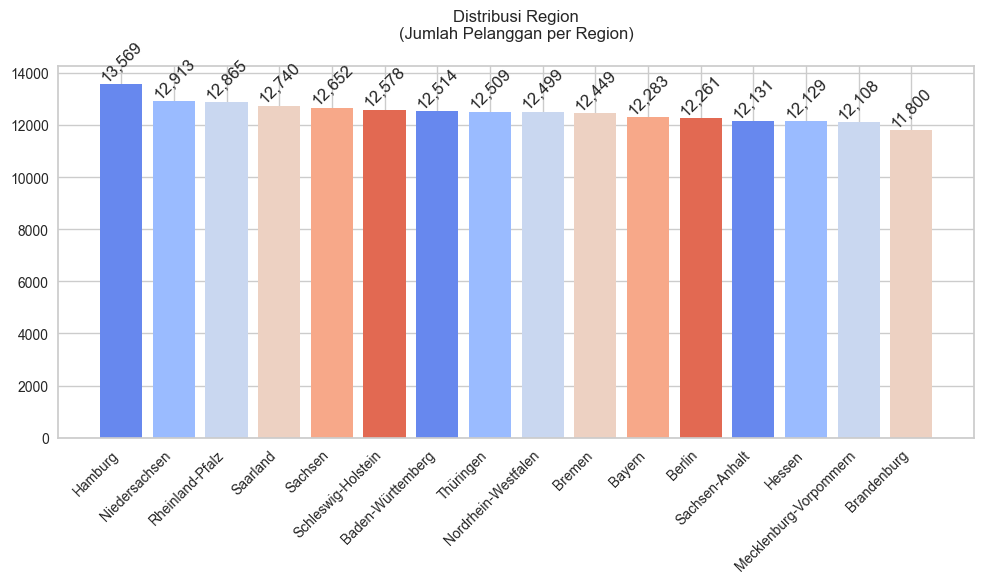


---> DISTRIBUSI PRODUK <---


,Jumlah,Persentase (%)
Product,,
Hohes C Orange,7400,3.7
Rauch Multivitamin,7150,3.6
Passion Fruit Juice,7135,3.6
Mango Juice,7122,3.6
Tomato Juice,7084,3.5
Cranberry Juice,7043,3.5
Granini Apple,6972,3.5
San Pellegrino,5731,2.9
Vittel,5698,2.8


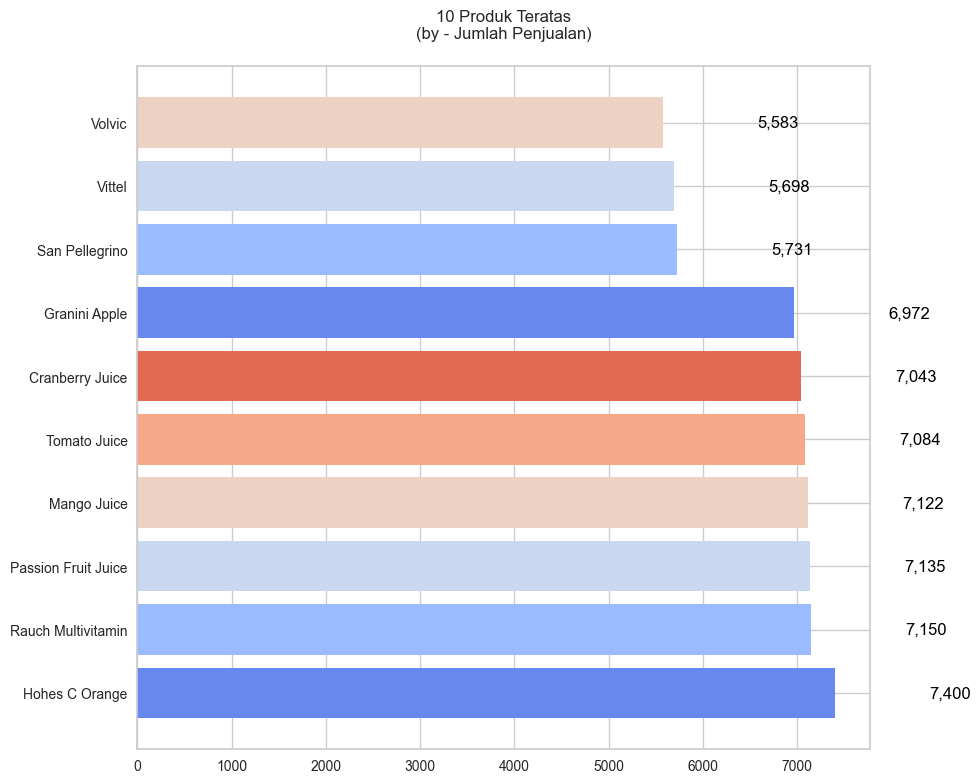

In [1337]:
# Fungsi untuk membuat visualisasi
def visualisasi_pie(data, judul):
  plt.figure(figsize=(12, 6))
  
  # Untuk Bar Chart
  plt.subplot(1, 2, 1) # untuk membuat layout
  bars = plt.bar(data.index, data['Jumlah'], color=sns.color_palette("coolwarm"))
  plt.title(f'Distribusi {judul}\n(Jumlah Asli)', pad=20)
  plt.xticks(rotation=0, ha='center')
  
  # Menambahkna label nilai di setiap bar
  for bar in bars:
    height = bar.get_height() # mengambil tinggi dari bar
    plt.text(
      bar.get_x() + bar.get_width()/2, # posisi horizontal label
      height,
      f'{height:,}',  # formating nilai dengan koma
      ha='center', # alignment label secara horizontal
      va='bottom') # alignment label secara vertikal
  
  # Untuk Pie Chart
  plt.subplot(1, 2, 2)
  plt.pie(
    data['Jumlah'], 
    labels=data.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=sns.color_palette("coolwarm")
  )
  plt.title(f'Distribusi {judul}\n(Persentase)', pad=20)
  
  plt.tight_layout()
  plt.show()

# Visualisasi untuk Kategori Produk
print("\n---> DISTRIBUSI KATEGORI PRODUK <---")
display(distribusi_kategori) # Menampilkan df distribusi_kategori
visualisasi_pie(distribusi_kategori, "Kategori Produk")

# Visualisasi untuk Tipe Pelanggan
print("\n---> DISTRIBUSI TIPE PELANGGAN <---")
display(distribusi_tipe_pelanggan)
visualisasi_pie(distribusi_tipe_pelanggan, "Tipe Pelanggan")

# Visualisasi khusus untuk Region (karena banyak kategori)
print("\n---> DISTRIBUSI REGION <---")
display(distribusi_region.head(10))  # Menampilkan 10 region teratas

plt.figure(figsize=(10, 6))
bars = plt.bar(distribusi_region.index, distribusi_region['Jumlah'], color=sns.color_palette("coolwarm"))
plt.title('Distribusi Region\n(Jumlah Pelanggan per Region)', pad=20)
plt.xticks(rotation=45 , ha='right')
plt.tight_layout()

# Tambahkan label nilai
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height,
    f'{height:,}',
    ha='center', va='bottom', rotation=45)
plt.show()

# Visualisasi khusus untuk Produk (karena banyak kategori)
print("\n---> DISTRIBUSI PRODUK <---")
display(distribusi_produk.head(10))  # Menampilkan 10 produk teratas

plt.figure(figsize=(10, 8))
top_10_produk = distribusi_produk.head(10)
bars = plt.barh(top_10_produk.index, top_10_produk['Jumlah'], color=sns.color_palette("coolwarm"))
plt.title('10 Produk Teratas\n(by - Jumlah Penjualan)', pad=20)

# Tambahkan label nilai
for i, v in enumerate(top_10_produk['Jumlah']):
    plt.text(v + 1000, i, f'{v:,}', color='black', va='center')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

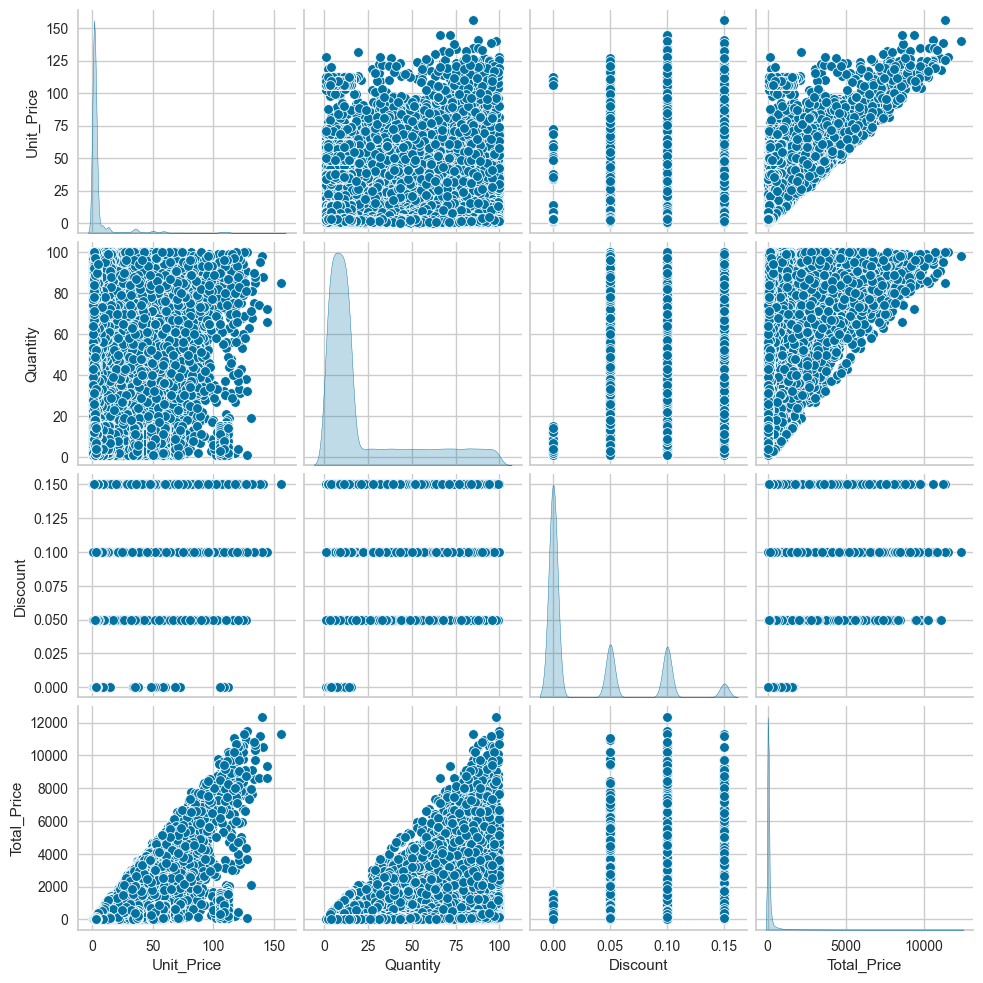

In [1338]:
# Pairplot untuk visualisasi semua kolom numerik
plt.figure(figsize=(12, 8))
sns.pairplot(df_sample.select_dtypes(include=['float64', 'int64']), diag_kind='kde')
plt.show()

**Summary :**

- Terdapat 4 Kategori produk [Alcoholic Beverages, Water, Soft Drinks & Juices] dengan persentase yang seimbang
- Segmentasi Pelanggan dominan pada **B2C yaitu 64.4%** sedangkan **B2B hanya 35.6%**
- Seluruh region jerman berkontribusi **merata** yaitu sekitar **5.9% s.d 6.7%**. Dimana Market terbesar tedapat pada region **Hamburg** sebesar **6.7%**
- Top 3 Produk yaitu :
  -  Hohes C Orange (3.7%)
  -  Granini Apple (3.5%)
  -  Rauch Multivitamin (3.5%)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Deteksi dan Penanganan Outlier
4. Normalisasi atau Standarisasi Fitur
5. Encoding Data Kategorikal

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [1339]:
# Sebelum di preprocessing data akan di duplikasi dulu
df_clean = df_sample.copy()
df_sample.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
120824,ORD40273,CUS1894,B2C,Granini Apple,Juices,1.64,14,0.00,22.96,Sachsen-Anhalt,2022-11-04
3265431,ORD1087863,CUS9681,B2B,Erdinger Weißbier,Alcoholic Beverages,3.14,83,0.15,221.53,Rheinland-Pfalz,2022-11-07
5132586,ORD1711012,CUS1539,B2B,Granini Apple,Juices,1.25,31,0.05,36.81,Bayern,2022-06-27
7857454,ORD2618976,CUS4341,B2B,Club Mate,Soft Drinks,1.90,56,0.10,95.76,Sachsen,2022-01-22
3173654,ORD1057294,CUS383,B2C,Apollinaris,Water,0.96,7,0.00,6.72,Bayern,2022-08-31


## 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [1340]:
# ---
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
# ---

print(f"data kosong : \n{df_clean.isnull().sum()}\n")

data kosong : 
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64



Tidak ada data Kosong


## 2. Mengubah Tipe Data

Mengubah tipe data kolom `Order Date` Menjadi `Datetime`

In [1341]:
# ---
# 2. Mengubah Tipe Data
# ---

print(f"Tipe Data asli : \n{df_sample.dtypes}\n")

df_clean['Order_Date'] = pd.to_datetime(df_clean['Order_Date'])


print(f"Tipe Data asli : \n{df_clean.dtypes}\n")

Tipe Data asli : 
Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object

Tipe Data asli : 
Order_ID                 object
Customer_ID              object
Customer_Type            object
Product                  object
Category                 object
Unit_Price              float64
Quantity                  int64
Discount                float64
Total_Price             float64
Region                   object
Order_Date       datetime64[ns]
dtype: object



## 3. Menghapus Data Duplikat

In [1342]:
# ---
# 3. Menghapus Data Duplikat
# ---
print(f"data duplikat : \n{df_clean.duplicated().sum()}")

data duplikat : 
0


In [ ]:
df_clean.shape

(200000, 11)

## 4. Deteksi dan Penanganan Outliers

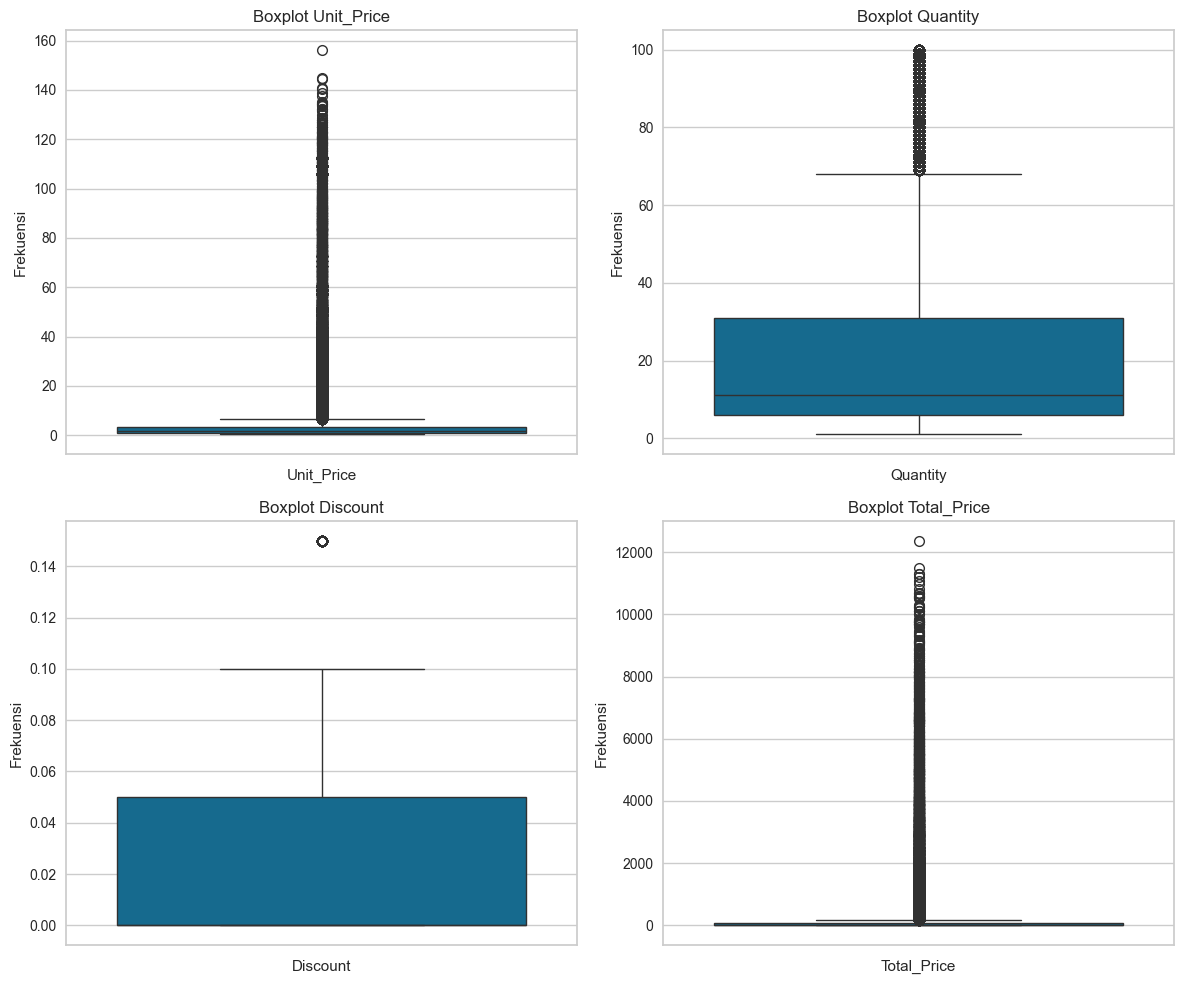


---> Kolom Unit_Price <---
jumlah data : 200,000
Jumlah Outlier : 24,297
Persentase Outlier : 12.15%

---> Kolom Quantity <---
jumlah data : 200,000
Jumlah Outlier : 22,976
Persentase Outlier : 11.49%

---> Kolom Discount <---
jumlah data : 200,000
Jumlah Outlier : 8,412
Persentase Outlier : 4.21%

---> Kolom Total_Price <---
jumlah data : 200,000
Jumlah Outlier : 26,003
Persentase Outlier : 13.0%


In [1344]:
# ---
# 4. Deteksi dan Penanganan Outlier
# ---

# Fungsi untuk mendeteksi outlier
def isOutlier(data, nama_kolom):
  q1 = data.quantile(0.25)
  q2 = data.quantile(0.75)
  iqr = q2 - q1
  
  batas_bawah = q1 - 1.5 * iqr
  batas_atas = q2 + 1.5 * iqr
  
  hasil = data[
    (data < batas_bawah) |
    (data > batas_atas)
  ]
    
  print(f"\n---> Kolom {nama_kolom} <---")
  print(f"jumlah data : {len(data):,}")
  print(f"Jumlah Outlier : {len(hasil):,}")
  print(f"Persentase Outlier : {round(len(hasil) / len(data) * 100, 2)}%")

# perulangan untuk membuat figure sesuai jumlah variabel numerik
plt.figure(figsize=(12, 10))
for i, col in enumerate(kolom_numerik, 1):
  plt.subplot(2, 2, i)
  sns.boxplot(df_clean[col])
  plt.title(f'Boxplot {col}')
  plt.xlabel(col)
  plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Looping untuk mendeteksi outlier
for col in kolom_numerik:
  isOutlier(df_clean[col], col)

Meskipun terdapat beberapa outliers pada fitur numerik, saya memutuskan untuk tidak menghapusnya dengan alasan persentasenya masih di bawah 15% dari data sample (200k/8jt). jadi menghapus outliers disini mungkin menyebabkan hasil clustering buruk

Tetapi dibawah ini akan saya hitung outliersnya dan akan saya bandingkan hasil silluetnya dibawah

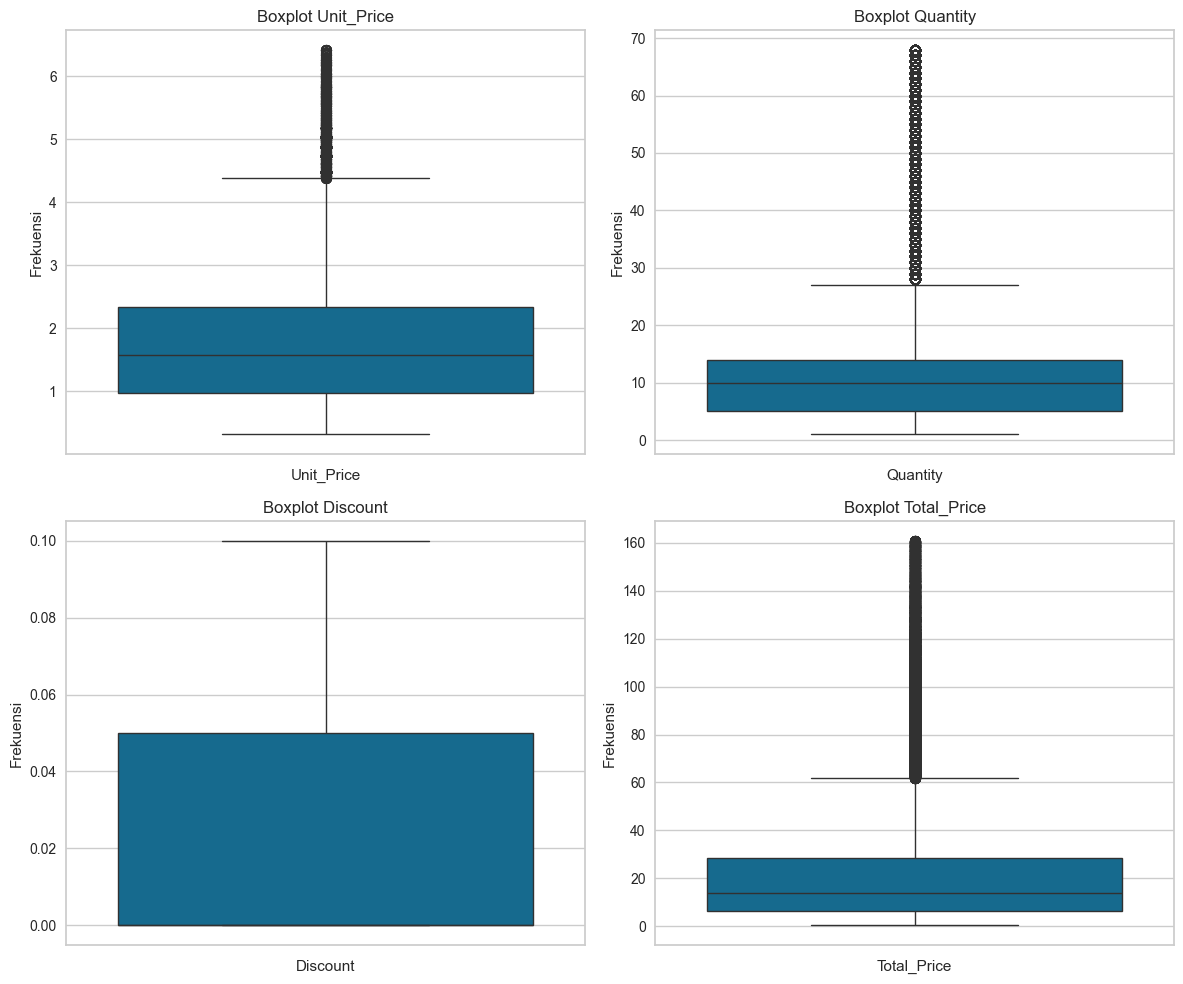


---> Kolom Unit_Price <---
jumlah data : 151,747
Jumlah Outlier : 2,817
Persentase Outlier : 1.86%

---> Kolom Quantity <---
jumlah data : 151,747
Jumlah Outlier : 21,857
Persentase Outlier : 14.4%

---> Kolom Discount <---
jumlah data : 151,747
Jumlah Outlier : 0
Persentase Outlier : 0.0%

---> Kolom Total_Price <---
jumlah data : 151,747
Jumlah Outlier : 11,683
Persentase Outlier : 7.7%


In [1345]:
# hapus outliers dengan IQR
q1 = df_clean[kolom_numerik].quantile(0.25) 
q2 = df_clean[kolom_numerik].quantile(0.75)
IQR = q2 - q1

batas_bawah = q1 - (1.5 * IQR)
batas_atas = q2 + (1.5 * IQR)

# menggunakan not operator
masking_outliers = ~(
  (df_clean[kolom_numerik] < batas_bawah) |
  (df_clean[kolom_numerik] > batas_atas)
).any(axis=1)

df_clean_outliers = df_clean[masking_outliers]

# perulangan untuk membuat figure sesuai jumlah variabel numerik
plt.figure(figsize=(12, 10))
for i, col in enumerate(kolom_numerik, 1):
  plt.subplot(2, 2, i)
  sns.boxplot(df_clean_outliers[col])
  plt.title(f'Boxplot {col}')
  plt.xlabel(col)
  plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

for col in kolom_numerik:
  isOutlier(df_clean_outliers[col], col)

In [1346]:
df_clean_outliers

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
120824,ORD40273,CUS1894,B2C,Granini Apple,Juices,1.64,14,0.00,22.96,Sachsen-Anhalt,2022-11-04
5132586,ORD1711012,CUS1539,B2B,Granini Apple,Juices,1.25,31,0.05,36.81,Bayern,2022-06-27
7857454,ORD2618976,CUS4341,B2B,Club Mate,Soft Drinks,1.90,56,0.10,95.76,Sachsen,2022-01-22
3173654,ORD1057294,CUS383,B2C,Apollinaris,Water,0.96,7,0.00,6.72,Bayern,2022-08-31
690456,ORD230048,CUS3310,B2C,Rockstar,Soft Drinks,2.34,15,0.00,35.10,Rheinland-Pfalz,2023-02-19
...,...,...,...,...,...,...,...,...,...,...,...
5450486,ORD1817135,CUS2652,B2C,Rauch Multivitamin,Juices,2.38,15,0.00,35.70,Sachsen-Anhalt,2022-12-26
3758052,ORD1252340,CUS5260,B2C,Mango Juice,Juices,3.12,14,0.00,43.68,Brandenburg,2021-09-07
6492528,ORD2164642,CUS8713,B2C,Tomato Juice,Juices,3.33,7,0.00,23.31,Mecklenburg-Vorpommern,2022-08-23
1198667,ORD399261,CUS4969,B2C,Tomato Juice,Juices,3.23,2,0.00,6.46,Nordrhein-Westfalen,2021-10-31


## 5. Normalisasi & Standarisasi

In [1347]:
# ---
# 5. Normalisasi atau Standarisasi Fitur
# ---

# Akan dilakukan standarisasi & normalisasi fitur
skala_standar = StandardScaler()
skala_minmax = MinMaxScaler()

# menstandarisasi fitur dengan outliers
kolom_standarisasi = ['Unit_Price', 'Total_Price']
df_clean_standarisasi = df_clean.copy()
df_clean_standarisasi[kolom_standarisasi] = skala_standar.fit_transform(df_clean[kolom_standarisasi])
print(df_clean_standarisasi.head())
print(df_clean_standarisasi.shape)

# menstandarisasi fitur tanpa outliers
df_clean_standarisasi_remove = df_clean_outliers.copy()
df_clean_standarisasi_remove[kolom_standarisasi] = skala_standar.fit_transform(df_clean_outliers[kolom_standarisasi])
print(df_clean_standarisasi_remove.head())
print(df_clean_standarisasi_remove.shape)

           Order_ID Customer_ID Customer_Type            Product  \
120824     ORD40273     CUS1894           B2C      Granini Apple   
3265431  ORD1087863     CUS9681           B2B  Erdinger Weißbier   
5132586  ORD1711012     CUS1539           B2B      Granini Apple   
7857454  ORD2618976     CUS4341           B2B          Club Mate   
3173654  ORD1057294      CUS383           B2C        Apollinaris   

                    Category  Unit_Price  Quantity  Discount  Total_Price  \
120824                Juices   -0.283818        14      0.00    -0.212972   
3265431  Alcoholic Beverages   -0.181669        83      0.15     0.182944   
5132586               Juices   -0.310377        31      0.05    -0.185357   
7857454          Soft Drinks   -0.266112        56      0.10    -0.067821   
3173654                Water   -0.330126         7      0.00    -0.245352   

                  Region Order_Date  
120824    Sachsen-Anhalt 2022-11-04  
3265431  Rheinland-Pfalz 2022-11-07  
5132586       

In [1348]:
# Menormalkan fitur dengan data outliers
df_clean_normalisasi = df_clean_standarisasi.copy()
df_clean_normalisasi['Quantity'] = skala_minmax.fit_transform(df_clean_standarisasi[['Quantity']])
print(f"data normalisasi with outliers: \n{df_clean_normalisasi.head()}")
print(df_clean_standarisasi.shape)

# Menormalkan fitur dengan data tanpa outliers
df_clean_normalisasi_remove = df_clean_standarisasi_remove.copy()
df_clean_normalisasi_remove['Quantity'] = skala_minmax.fit_transform(df_clean_standarisasi_remove[['Quantity']])

print(f"\ndata normalisasi tanpa outliers: \n{df_clean_normalisasi_remove.head()}")
print(df_clean_standarisasi_remove.shape)

data normalisasi with outliers: 
           Order_ID Customer_ID Customer_Type            Product  \
120824     ORD40273     CUS1894           B2C      Granini Apple   
3265431  ORD1087863     CUS9681           B2B  Erdinger Weißbier   
5132586  ORD1711012     CUS1539           B2B      Granini Apple   
7857454  ORD2618976     CUS4341           B2B          Club Mate   
3173654  ORD1057294      CUS383           B2C        Apollinaris   

                    Category  Unit_Price  Quantity  Discount  Total_Price  \
120824                Juices   -0.283818  0.131313      0.00    -0.212972   
3265431  Alcoholic Beverages   -0.181669  0.828283      0.15     0.182944   
5132586               Juices   -0.310377  0.303030      0.05    -0.185357   
7857454          Soft Drinks   -0.266112  0.555556      0.10    -0.067821   
3173654                Water   -0.330126  0.060606      0.00    -0.245352   

                  Region Order_Date  
120824    Sachsen-Anhalt 2022-11-04  
3265431  Rheinland-

## 6. Encoding Data Kategorikal

In [1458]:
# ---
# 6. Encoding Data Kategorikal
# ---

encoder = LabelEncoder()

encoder_dictionary = {}

kolom_kategorikal = ['Product', 'Category', 'Region']

df_clean_encoded = df_clean_normalisasi.copy()

for col in kolom_kategorikal:
  df_clean_encoded[col] = encoder.fit_transform(df_clean_standarisasi[col]) # Mengubah data kategorikal menjadi numerik
  encoder_dictionary[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
  # encoder_dictionary[col] = LabelEncoder()

df_clean_hot_encoded = pd.get_dummies(df_clean_encoded, columns=['Customer_Type'])
df_clean_hot_encoded.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
120824,ORD40273,CUS1894,13,1,-0.283818,0.131313,0.00,-0.212972,13,2022-11-04,False,True
3265431,ORD1087863,CUS9681,8,0,-0.181669,0.828283,0.15,0.182944,10,2022-11-07,True,False
5132586,ORD1711012,CUS1539,13,1,-0.310377,0.303030,0.05,-0.185357,1,2022-06-27,True,False
7857454,ORD2618976,CUS4341,5,2,-0.266112,0.555556,0.10,-0.067821,12,2022-01-22,True,False
3173654,ORD1057294,CUS383,0,3,-0.330126,0.060606,0.00,-0.245352,1,2022-08-31,False,True


In [1459]:
encoder_dictionary

{'Product': {'Apollinaris': np.int64(0),
  'Augustiner': np.int64(1),
  'Bacardi': np.int64(2),
  "Beck's": np.int64(3),
  'Chardonnay': np.int64(4),
  'Club Mate': np.int64(5),
  'Coca-Cola': np.int64(6),
  'Cranberry Juice': np.int64(7),
  'Erdinger Weißbier': np.int64(8),
  'Evian': np.int64(9),
  'Fanta': np.int64(10),
  'Fritz-Kola': np.int64(11),
  'Gerolsteiner': np.int64(12),
  'Granini Apple': np.int64(13),
  'Havana Club': np.int64(14),
  'Hohes C Orange': np.int64(15),
  'Jack Daniels': np.int64(16),
  'Jever': np.int64(17),
  'Johnnie Walker': np.int64(18),
  'Krombacher': np.int64(19),
  'Kölsch': np.int64(20),
  'Mango Juice': np.int64(21),
  'Merlot': np.int64(22),
  'Mezzo Mix': np.int64(23),
  'Monster': np.int64(24),
  'Mountain Dew': np.int64(25),
  'Moët & Chandon': np.int64(26),
  'Passion Fruit Juice': np.int64(27),
  'Pepsi': np.int64(28),
  'Rauch Multivitamin': np.int64(29),
  'Red Bull': np.int64(30),
  'Riesling': np.int64(31),
  'Rockstar': np.int64(32),
  '

In [1465]:
# Buat mapping
encoder_mapping = {
    col: {v: k for k, v in encoder_dictionary[col].items()} 
    for col in kolom_kategorikal
}
# seleksinya nanti gini aja
encoder_mapping['Category']

{np.int64(0): 'Alcoholic Beverages',
 np.int64(1): 'Juices',
 np.int64(2): 'Soft Drinks',
 np.int64(3): 'Water'}

In [1464]:
df_clean_hot_encoded.shape

(200000, 12)

In [1351]:
kolom_kategorikal = ['Product', 'Category', 'Region']

df_clean_encoded_remove = df_clean_normalisasi_remove.copy()

for col in kolom_kategorikal:
  df_clean_encoded_remove[col] = encoder.fit_transform(df_clean_standarisasi_remove[col]) # Mengubah data kategorikal menjadi numerik
  
df_clean_hot_encoded_remove = pd.get_dummies(df_clean_encoded_remove, columns=['Customer_Type'])
df_clean_hot_encoded_remove.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
120824,ORD40273,CUS1894,12,1,-0.133952,0.194030,0.00,0.001035,13,2022-11-04,False,True
5132586,ORD1711012,CUS1539,12,1,-0.506844,0.447761,0.05,0.527527,1,2022-06-27,True,False
7857454,ORD2618976,CUS4341,4,2,0.114642,0.820896,0.10,2.768444,12,2022-01-22,True,False
3173654,ORD1057294,CUS383,0,3,-0.784122,0.089552,0.00,-0.616310,1,2022-08-31,False,True
690456,ORD230048,CUS3310,27,2,0.535340,0.208955,0.00,0.462523,10,2023-02-19,False,True


In [1352]:
df_clean_hot_encoded_remove.shape

(151747, 12)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [1353]:
df_clean_hot_encoded.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
120824,ORD40273,CUS1894,13,1,-0.283818,0.131313,0.00,-0.212972,13,2022-11-04,False,True
3265431,ORD1087863,CUS9681,8,0,-0.181669,0.828283,0.15,0.182944,10,2022-11-07,True,False
5132586,ORD1711012,CUS1539,13,1,-0.310377,0.303030,0.05,-0.185357,1,2022-06-27,True,False
7857454,ORD2618976,CUS4341,5,2,-0.266112,0.555556,0.10,-0.067821,12,2022-01-22,True,False
3173654,ORD1057294,CUS383,0,3,-0.330126,0.060606,0.00,-0.245352,1,2022-08-31,False,True


In [1354]:
df_clean_hot_encoded.shape

(200000, 12)

In [1355]:
# Menggunakan K-Means Clustering
fitur_kmeans = ['Unit_Price', 'Quantity', 'Total_Price', 'Discount', 'Product', 'Category', 'Region', 'Customer_Type_B2B', 'Customer_Type_B2C']

df_x = df_clean_hot_encoded[fitur_kmeans]
df_x.head()

,Unit_Price,Quantity,Total_Price,Discount,Product,Category,Region,Customer_Type_B2B,Customer_Type_B2C
120824,-0.283818,0.131313,-0.212972,0.00,13,1,13,False,True
3265431,-0.181669,0.828283,0.182944,0.15,8,0,10,True,False
5132586,-0.310377,0.303030,-0.185357,0.05,13,1,1,True,False
7857454,-0.266112,0.555556,-0.067821,0.10,5,2,12,True,False
3173654,-0.330126,0.060606,-0.245352,0.00,0,3,1,False,True


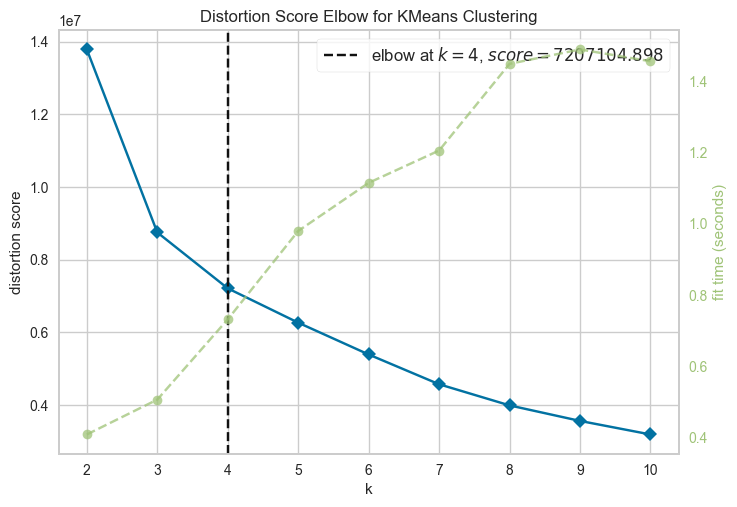

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1356]:
model = KMeans(
  random_state=stateRandom, n_init=10
)
visElbow = KElbowVisualizer(model, k=(2, 11))
visElbow.fit(df_x)
visElbow.show()

In [1357]:
model_fix = KMeans(n_clusters=visElbow.elbow_value_,init='k-means++', random_state=stateRandom, n_init=10)
model_fix.fit(df_x)

KMeans(n_clusters=np.int64(4), n_init=10, random_state=65)

Dikarenakan fiturnya banyak. akan dilakukan Principal Component Analysis

In [1358]:
pca = PCA(n_components=0.95) # Menggunakan PCA dengan 95% variance
pca.fit(df_x)
print(f"Jumlah Komponen PCA Optimal: {pca.n_components_}")

Jumlah Komponen PCA Optimal: 2


In [1359]:
x_pca = pca.transform(df_x)
df_pca = pd.DataFrame(
  x_pca,
  columns=[f"PCA_{i+1}" for i in range (pca.n_components_)]
)

df_pca.head()

,PCA_1,PCA_2
0,-10.543356,5.493611
1,-15.564724,2.500980
2,-10.565156,-6.508055
3,-18.524583,4.506299
4,-23.526029,-6.482898


In [1360]:
df_pca.shape

(200000, 2)

In [1361]:
kmeans_with_pca = KMeans(
  n_clusters=visElbow.elbow_value_,
  init='k-means++',
  random_state=stateRandom,
  n_init=10
)

kmeans_with_pca.fit(x_pca)

KMeans(n_clusters=np.int64(4), n_init=10, random_state=65)

In [1362]:
x_pca.shape

(200000, 2)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [1363]:
model_fix_pca = KMeans(n_clusters=visElbow.elbow_value_,init='k-means++', random_state=stateRandom, n_init=10)
model_fix_pca.fit(df_pca)

df_pca_fit = df_pca.copy()
df_pca_fit["Cluster"] = model_fix_pca.fit_predict(df_pca)

In [1364]:
df_pca_fit.shape
df_pca_fit_sample = df_pca_fit.sample(n=10000, random_state=stateRandom)
df_pca_fit_sample.shape

(10000, 3)

In [1365]:
skor_siluet = silhouette_score(df_pca_fit_sample.iloc[:, :-1], df_pca_fit_sample["Cluster"])
print(f"Silhouette Score untuk k={visElbow.elbow_value_}: {skor_siluet:.4f}")

Silhouette Score untuk k=4: 0.3761


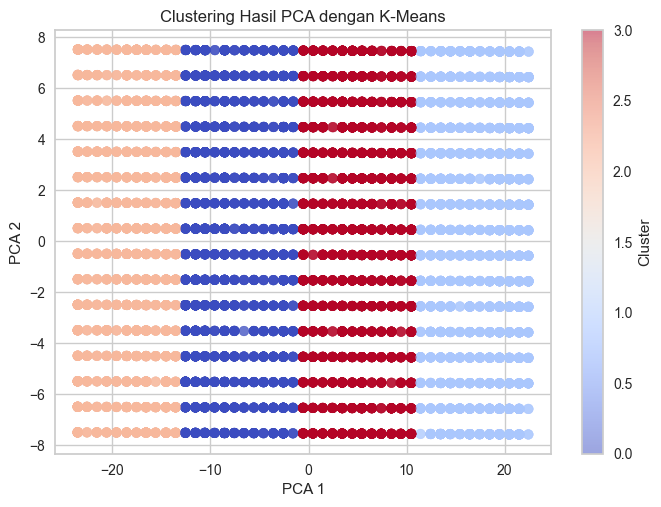

In [1568]:
# Visualisasi hasil clustering
plt.scatter(df_pca_fit_sample["PCA_1"], df_pca_fit_sample["PCA_2"], c=df_pca_fit_sample["Cluster"], cmap='coolwarm', alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering Hasil PCA dengan K-Means")
plt.colorbar(label="Cluster")
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [1367]:
# fitur baru
fitur_kmeans_baru = ['Total_Price', 'Quantity', 'Customer_Type_B2C' , 'Customer_Type_B2B' , 'Discount']
df_x_baru = df_clean_hot_encoded[fitur_kmeans_baru]
print(df_x_baru.head())
print(df_x_baru.shape)

df_x_baru_remove = df_clean_hot_encoded_remove[fitur_kmeans_baru]
print(df_x_baru_remove.head())
print(df_x_baru_remove.shape)

         Total_Price  Quantity  Customer_Type_B2C  Customer_Type_B2B  Discount
120824     -0.212972  0.131313               True              False      0.00
3265431     0.182944  0.828283              False               True      0.15
5132586    -0.185357  0.303030              False               True      0.05
7857454    -0.067821  0.555556              False               True      0.10
3173654    -0.245352  0.060606               True              False      0.00
(200000, 5)
         Total_Price  Quantity  Customer_Type_B2C  Customer_Type_B2B  Discount
120824      0.001035  0.194030               True              False      0.00
5132586     0.527527  0.447761              False               True      0.05
7857454     2.768444  0.820896              False               True      0.10
3173654    -0.616310  0.089552               True              False      0.00
690456      0.462523  0.208955               True              False      0.00
(151747, 5)


In [ ]:
# modeling kmeans untuk dataset dengan outliers
kmeans_baru = KMeans(
  n_clusters=visElbow.elbow_value_,
  init='k-means++',
  random_state=stateRandom,
  n_init=10
)
kmeans_baru.fit(df_x_baru)

# modeling kmeans untuk dataset tanpa outliers
kmeans_baru_remove = KMeans(
  n_clusters=visElbow.elbow_value_,
  init='k-means++',
  random_state=stateRandom,
  n_init=10
)
kmeans_baru_remove.fit(df_x_baru_remove)



# Menambahkan cluster ke dataset
df_x_baru['Cluster'] = kmeans_baru.labels_

# Membuat sampling data untuk mempercepat proses silhouette
df_x_baru_sample = df_x_baru.sample(n=10000, random_state=stateRandom)
skor_siluet_baru = silhouette_score(df_x_baru_sample.iloc[:, :-1], df_x_baru_sample["Cluster"])

# data dg tanpa outliers
df_x_baru_remove['Cluster'] = kmeans_baru_remove.labels_
df_x_baru_remove_sample = df_x_baru_remove.sample(n=10000, random_state=stateRandom)
skor_siluet_baru_remove = silhouette_score(df_x_baru_remove_sample.iloc[:, :-1], df_x_baru_remove_sample["Cluster"])


# Menampilkan Hasil siluet sebelum & sesudah Feature Selection
print(f"Skor Siluet Lama (k={visElbow.elbow_value_}) : {skor_siluet:.4f}")
print(f"Skor Siluet Baru tanpa Outliers (k={visElbow.elbow_value_}) : {skor_siluet_baru_remove:.4f}")
print(f"Skor Siluet Baru dengan outliers (k={visElbow.elbow_value_}) : {skor_siluet_baru:.4f}")

C:\Users\Nur Aria Hibnastiar\AppData\Local\Temp\ipykernel_14300\3801348538.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_baru['Cluster'] = kmeans_baru.labels_
C:\Users\Nur Aria Hibnastiar\AppData\Local\Temp\ipykernel_14300\3801348538.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_baru_remove['Cluster'] = kmeans_baru_remove.labels_


Skor Siluet Lama (k=4) : 0.3761
Skor Siluet Baru tanpa Outliers (k=4) : 0.6027
Skor Siluet Baru dengan outliers (k=4) : 0.8215


**Summary :**

Dikarenakan tanpa perbandingannya cukup jauh skor silluet tertinggi jatuh pada dataset dengan outliers / tanpa dihapus outliersnya

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

**1. Tanpa PCA**

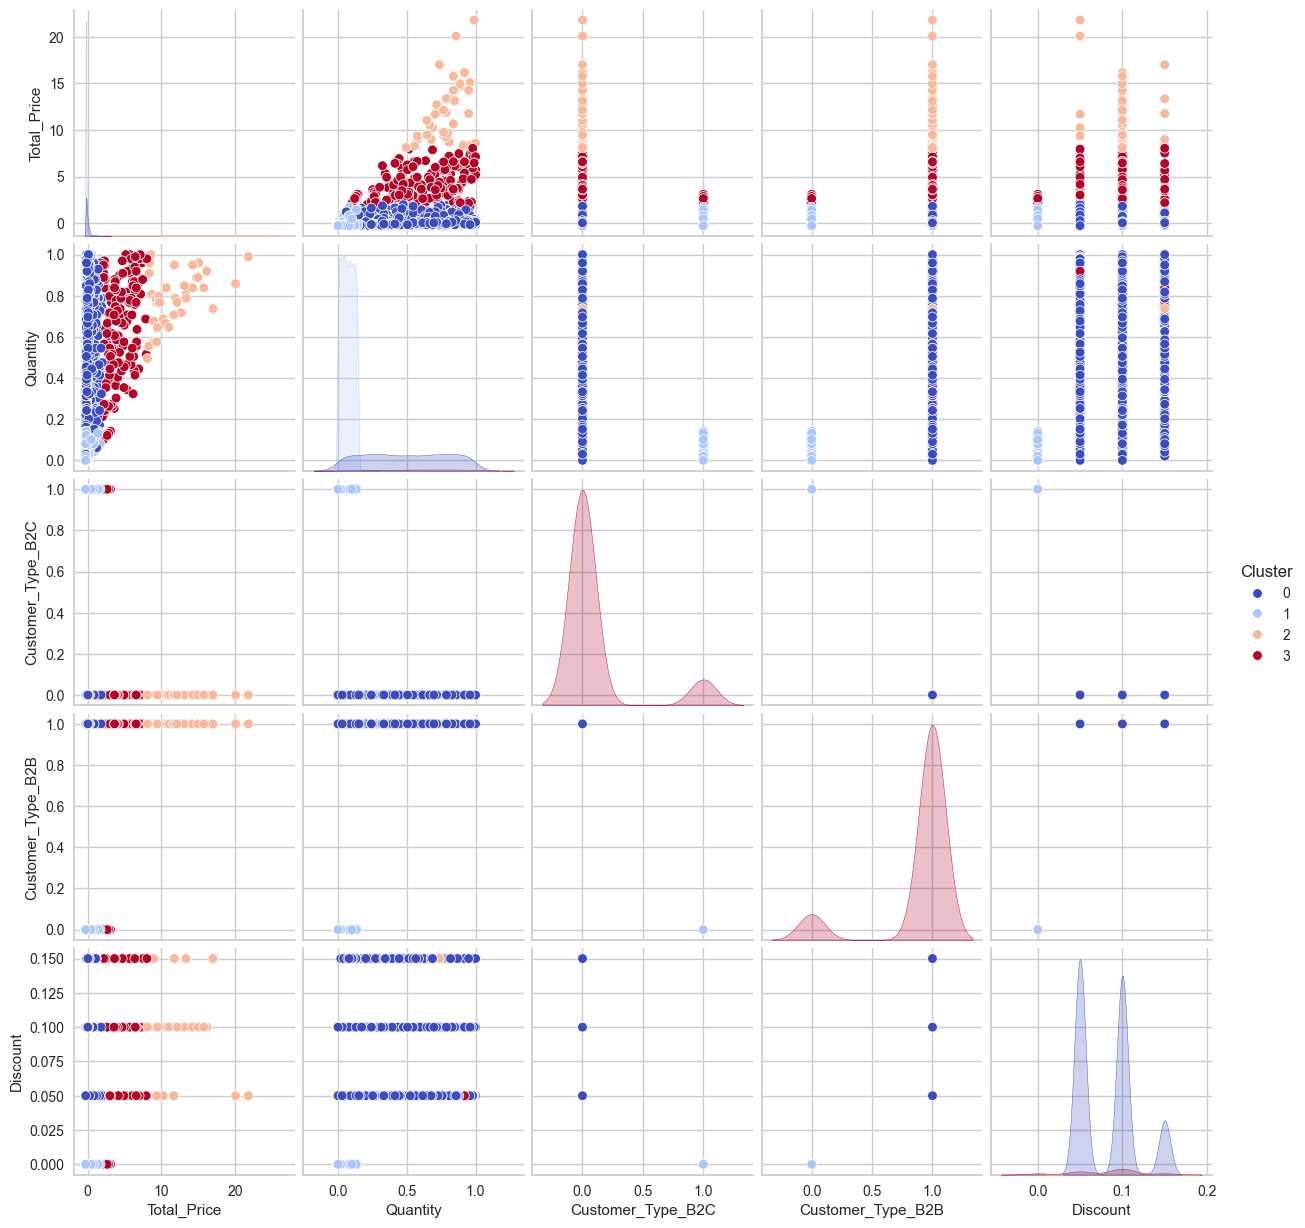

In [1567]:
# Pairplot untuk melihat distribusi antar fitur dengan cluster sebagai warna
sns.pairplot(df_x_baru_sample, hue='Cluster', palette='coolwarm')
plt.show()

**2. Dengan PCA**

In [1370]:
# Membuat PCA(Principal Component Analysis) menjadi 95% variance
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(df_x_baru_sample.iloc[:, :-1])  # Mengabaikan kolom cluster saat transformasi
print(f"Jumlah Komponen PCA Optimal: {pca.n_components_}")

Jumlah Komponen PCA Optimal: 2


In [1439]:
# Menjalankan K-Means pada data hasil PCA
kmeans_with_pca = KMeans(n_clusters=visElbow.elbow_value_, init='k-means++', random_state=stateRandom, n_init=10)  # Sesuaikan jumlah cluster
kmeans_with_pca.fit(x_pca)

# Membuat DataFrame baru untuk visualisasi
df_pca = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2'])  
df_pca['Cluster'] = kmeans_with_pca.labels_  # Menambahkan label cluster
df_pca.head()

,PCA1,PCA2,Cluster
0,-0.404633,-0.440167,1
1,1.991321,0.470691,0
2,-0.338453,-0.425800,1
3,0.218288,0.979204,0
4,-0.337880,-0.457913,1


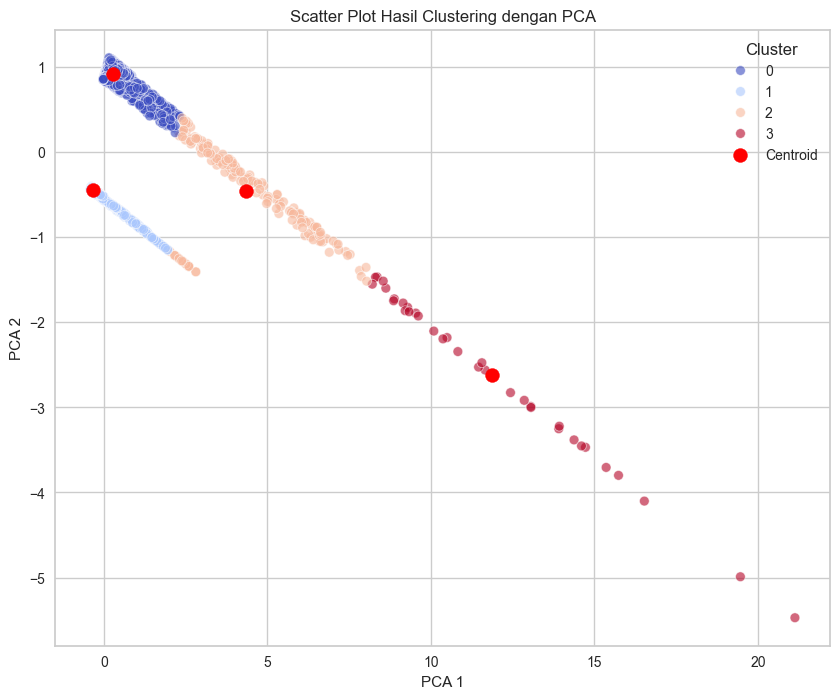

In [1566]:
# Visualisasi scatter plot dengan warna berbeda untuk tiap cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(
  x=df_pca['PCA1'],
  y=df_pca['PCA2'],
  hue=df_pca['Cluster'],
  palette='coolwarm',
  alpha=0.6
)

# Plot centroid dalam ruang PCA
centroids_pca = kmeans_with_pca.cluster_centers_

# Plot centroid
plt.scatter(
  centroids_pca[:, 0], centroids_pca[:, 1], 
  marker='o', s=100, color='red', label='Centroid'
)

plt.title('Scatter Plot Hasil Clustering dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [1373]:
df_pca['Cluster'].value_counts()

Cluster
1    6457
0    3339
2     169
3      35
Name: count, dtype: int64

**Summary :**

- scatter plot dengan PCA dimana mereduksi data menjadi 2 komponent dengan 4 cluster terbentuk
- Setiap warna mewakili setiap cluster dan titk merah merupakan centroid

## **e. Analisis dan Interpretasi Hasil Cluster**

**1. inverse data**

In [1494]:
df_final = df_clean_encoded.copy()
df_final.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
120824,ORD40273,CUS1894,B2C,13,1,-0.283818,0.131313,0.00,-0.212972,13,2022-11-04
3265431,ORD1087863,CUS9681,B2B,8,0,-0.181669,0.828283,0.15,0.182944,10,2022-11-07
5132586,ORD1711012,CUS1539,B2B,13,1,-0.310377,0.303030,0.05,-0.185357,1,2022-06-27
7857454,ORD2618976,CUS4341,B2B,5,2,-0.266112,0.555556,0.10,-0.067821,12,2022-01-22
3173654,ORD1057294,CUS383,B2C,0,3,-0.330126,0.060606,0.00,-0.245352,1,2022-08-31


In [1495]:
df_final['Cluster'] = df_x_baru['Cluster']
df_final['Cluster'].unique()

array([1, 0, 3, 2], dtype=int32)

In [1496]:
df_final[['Quantity']] = skala_minmax.inverse_transform(df_final[['Quantity']])
df_final[['Total_Price', 'Unit_Price']] = skala_standar.inverse_transform(df_final[['Total_Price', 'Unit_Price']])
df_final.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
120824,ORD40273,CUS1894,B2C,13,1,15.466604,9.797980,0.00,1.557355,13,2022-11-04,1
3265431,ORD1087863,CUS9681,B2B,8,0,18.153763,56.494949,0.15,1.971436,10,2022-11-07,0
5132586,ORD1711012,CUS1539,B2B,13,1,14.767943,21.303030,0.05,1.586236,1,2022-06-27,0
7857454,ORD2618976,CUS4341,B2B,5,2,15.932378,38.222222,0.10,1.709166,12,2022-01-22,0
3173654,ORD1057294,CUS383,B2C,0,3,14.248425,5.060606,0.00,1.523489,1,2022-08-31,1


In [1497]:
# inverse encoding
for col in kolom_kategorikal:
  df_final[col] = df_final[col].map(encoder_mapping[col])
  missing_values = set(df_final[col]) - set(encoder_mapping[col].values())
  print(f"Kolom {col}, nilai tidak ditemukan di dictionary: {missing_values}")

Kolom Product, nilai tidak ditemukan di dictionary: set()
Kolom Category, nilai tidak ditemukan di dictionary: set()
Kolom Region, nilai tidak ditemukan di dictionary: set()


Semua Kategori Cocok

In [1499]:
df_final.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
120824,ORD40273,CUS1894,B2C,Granini Apple,Juices,15.466604,9.797980,0.00,1.557355,Sachsen-Anhalt,2022-11-04,1
3265431,ORD1087863,CUS9681,B2B,Erdinger Weißbier,Alcoholic Beverages,18.153763,56.494949,0.15,1.971436,Rheinland-Pfalz,2022-11-07,0
5132586,ORD1711012,CUS1539,B2B,Granini Apple,Juices,14.767943,21.303030,0.05,1.586236,Bayern,2022-06-27,0
7857454,ORD2618976,CUS4341,B2B,Club Mate,Soft Drinks,15.932378,38.222222,0.10,1.709166,Sachsen,2022-01-22,0
3173654,ORD1057294,CUS383,B2C,Apollinaris,Water,14.248425,5.060606,0.00,1.523489,Bayern,2022-08-31,1


In [1500]:
df_final.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
Cluster          0
dtype: int64

**2. Analisis dan Interpretasi Data**

In [1501]:
# Frekuensi Tiap Cluster
df_final['Cluster'].value_counts()

Cluster
1    128167
0     67368
3      3760
2       705
Name: count, dtype: int64

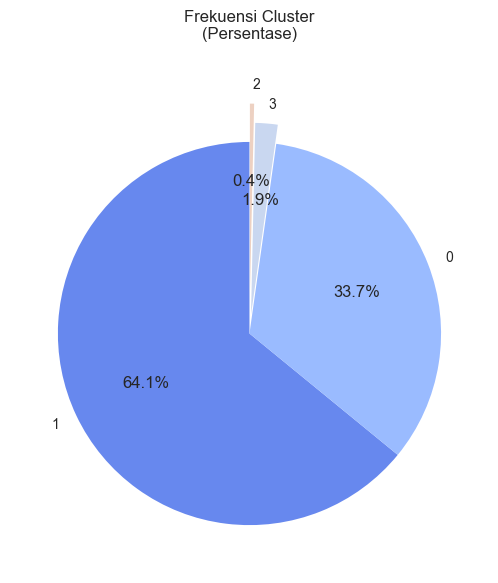

In [1539]:
  # Untuk Pie Chart
plt.figure(figsize=(10, 6))
explode = (0, 0, 0.1, 0.2)  # Bagian 3 dan 4 digeser
plt.pie(
  df_final['Cluster'].value_counts(), 
  labels=df_final['Cluster'].value_counts().index, 
  autopct='%1.1f%%', 
  startangle=90,
  colors=sns.color_palette("coolwarm"),
  explode=explode
)
plt.title(f'Frekuensi {df_final["Cluster"].name}\n(Persentase)', pad=40)

plt.tight_layout()
plt.show()

In [1573]:
# 1. Persebaran Cluster
persebaran_cluster = df_final['Cluster'].value_counts()
print("Persebaran Cluster :")
print(persebaran_cluster)

# 2. Analissi Statistik per Cluster
rangkuman_statistik = df_final.groupby('Cluster')[kolom_numerik].agg(['mean', 'std', 'min', 'max'])
print("\nAnaliss Statistik / cluster :")
print(rangkuman_statistik)

# 3. Persebaran Kategori berdasarkan Cluster
kategorikal_dist = {}
for col in kolom_kategorikal:
  kategorikal_dist[col] = df_final.groupby(['Cluster', col]).size().unstack(fill_value=0)

# 4. Persebaran Customer Type pada setiab cluster
customer_type_by_cluster = df_final.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)
print("\nPersebaran Customer Type / Cluster:")
print(customer_type_by_cluster)

# Menampilkan hasil Persebaran kategori
print("\nPersebaran Kategori Product / cluster:")
print(kategorikal_dist['Product'])

print("\nPersebaran Kategori Category / cluster:")
print(kategorikal_dist['Category'])

print("\nPersebaran Kategori Region / cluster:")
print(kategorikal_dist['Region'])

Persebaran Cluster :
Cluster
1    128167
0     67368
3      3760
2       705
Name: count, dtype: int64

Analiss Statistik / cluster :
         Unit_Price                                     Quantity             \
               mean        std        min         max       mean        std   
Cluster                                                                       
0         18.068407  10.425790  13.101904  241.170057  33.831530  19.567043   
1         22.404172  25.139730  13.352706  213.993921   5.715191   2.917636   
2        167.492676  37.337330  97.657845  292.584368  55.455319   8.862423   
3        101.001547  51.107966  34.993294  248.407472  40.410738  17.924693   

                               Discount                       Total_Price  \
               min        max      mean       std   min   max        mean   
Cluster                                                                     
0         1.000000  68.000000  0.082727  0.033779  0.05  0.15    1.761428   
1   

C:\Users\Nur Aria Hibnastiar\AppData\Local\Temp\ipykernel_14300\1810772702.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(y=col, hue='Cluster', data=df_final, order=df_final[col].value_counts().index, palette=sns.color_palette("coolwarm"))


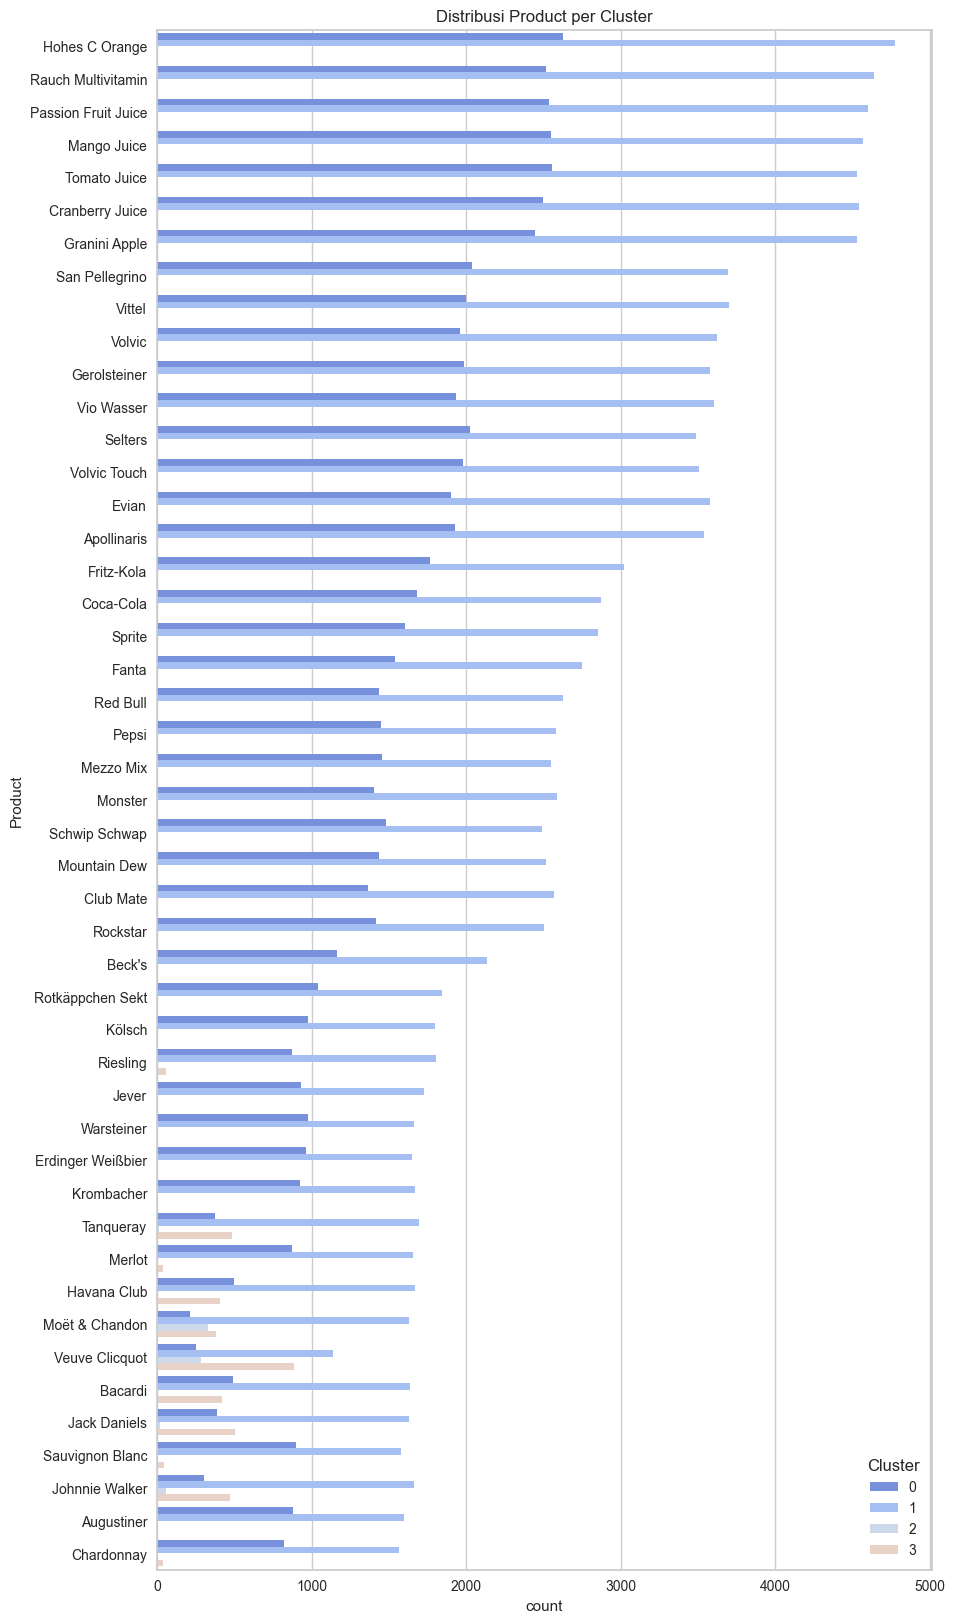

C:\Users\Nur Aria Hibnastiar\AppData\Local\Temp\ipykernel_14300\1810772702.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(y=col, hue='Cluster', data=df_final, order=df_final[col].value_counts().index, palette=sns.color_palette("coolwarm"))


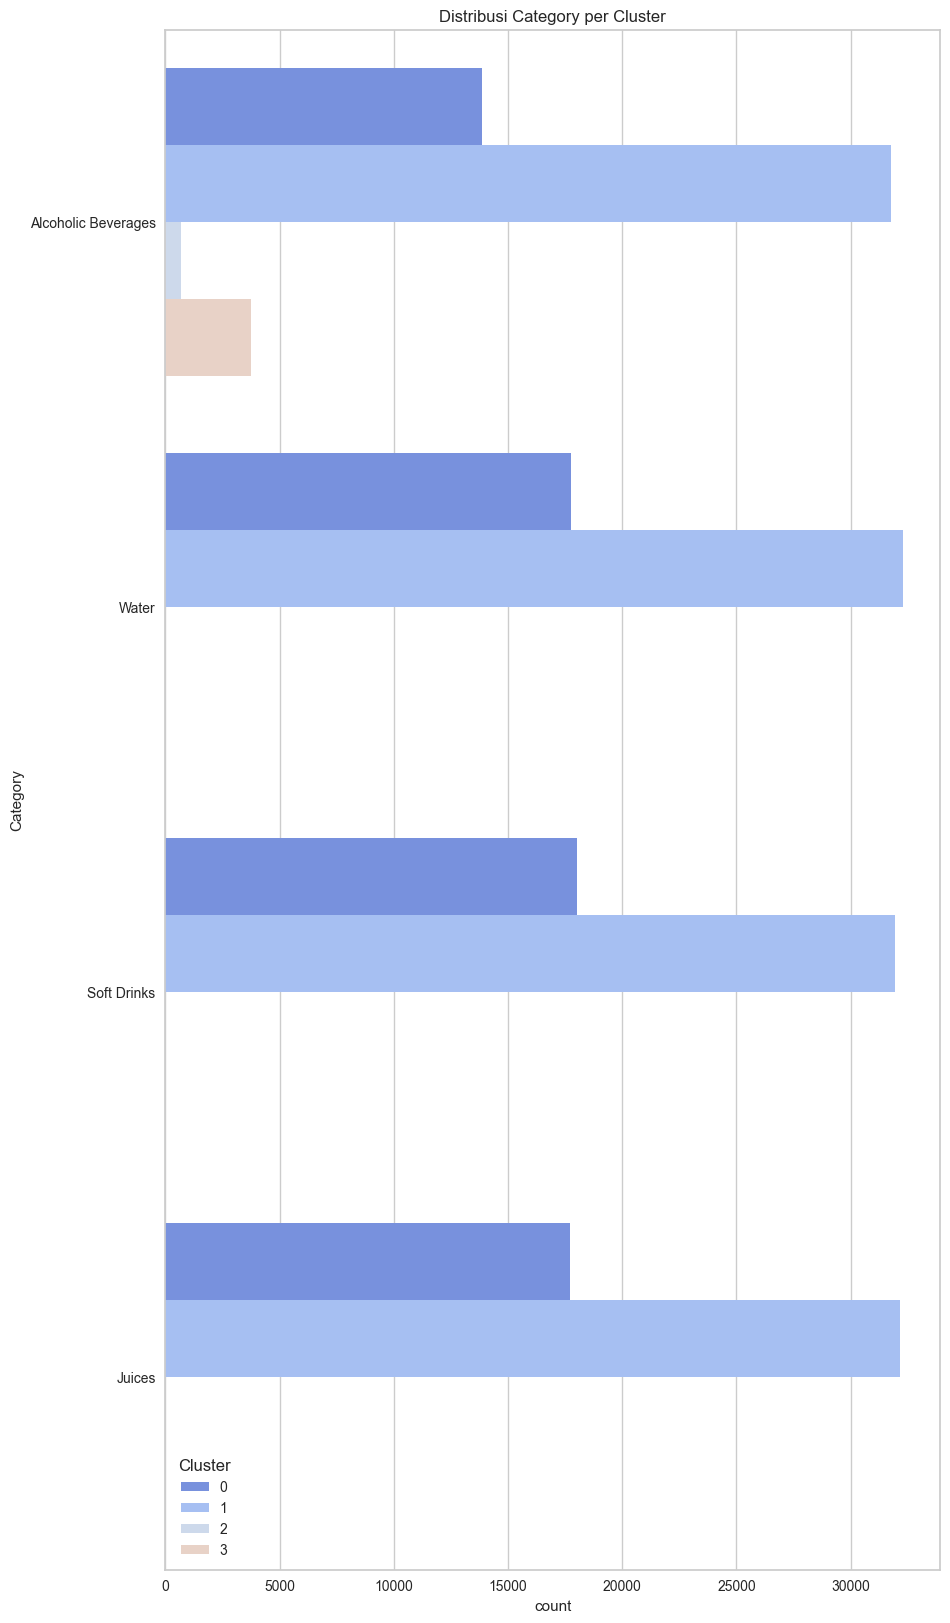

C:\Users\Nur Aria Hibnastiar\AppData\Local\Temp\ipykernel_14300\1810772702.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(y=col, hue='Cluster', data=df_final, order=df_final[col].value_counts().index, palette=sns.color_palette("coolwarm"))


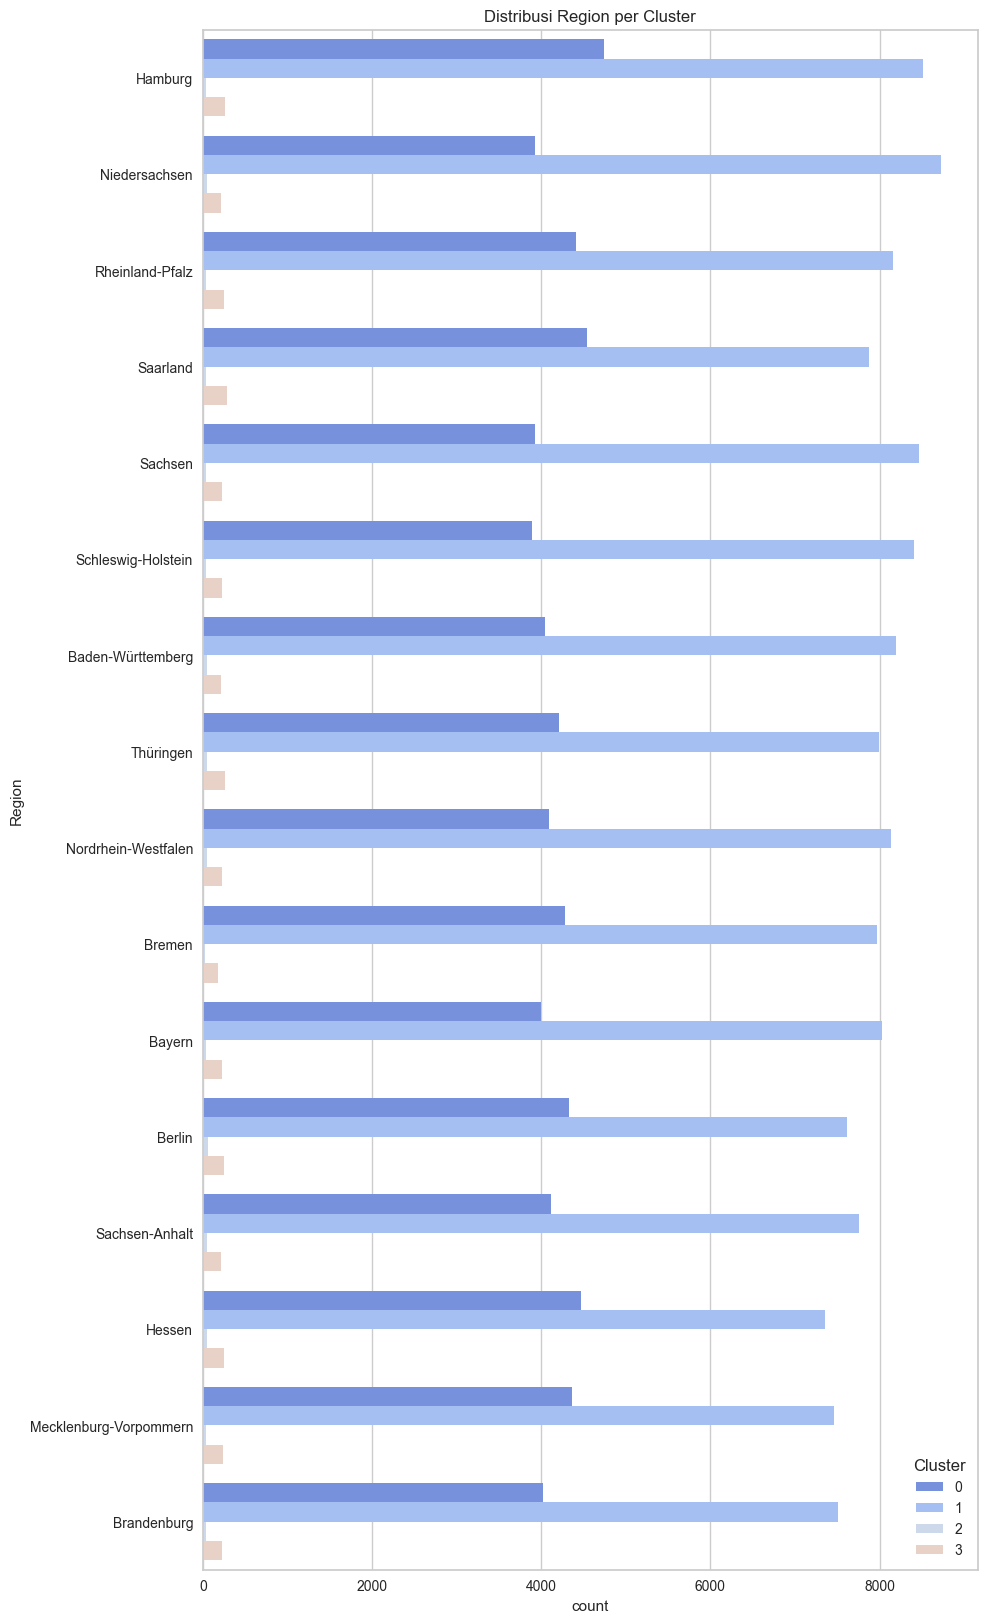

In [1564]:
for col in kolom_kategorikal:
  plt.figure(figsize=(10,20))
  sns.countplot(y=col, hue='Cluster', data=df_final, order=df_final[col].value_counts().index, palette=sns.color_palette("coolwarm"))
  plt.title(f'Distribusi {col} per Cluster')
  plt.legend(title='Cluster')
  plt.show()

C:\Users\Nur Aria Hibnastiar\AppData\Local\Temp\ipykernel_14300\4058800857.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Cluster', hue='Customer_Type', data=df_final, order=df_final['Cluster'].value_counts().index, palette=sns.color_palette("coolwarm"))


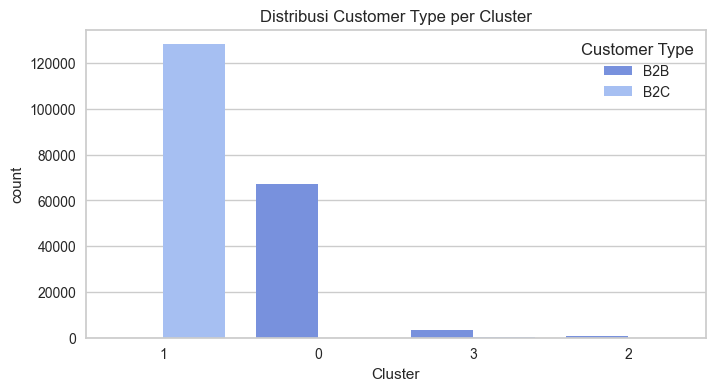

In [1563]:
# 5. Cek Proporsi Customer Type per Cluster
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', hue='Customer_Type', data=df_final, order=df_final['Cluster'].value_counts().index, palette=sns.color_palette("coolwarm"))
plt.title('Distribusi Customer Type per Cluster')
plt.legend(title='Customer Type')
plt.show()

In [1576]:
# 1. Persebaran Cluster
persebaran_cluster = df_final['Cluster'].value_counts()
print("Persebaran Cluster :")
print(persebaran_cluster)

# 2. Analissi Statistik per Cluster
rangkuman_statistik = df_final.groupby('Cluster')[kolom_numerik].agg(['mean', 'std', 'min', 'max'])
print("\nAnaliss Statistik / cluster :")
print(rangkuman_statistik)

# 3. Persebaran Kategori berdasarkan Cluster
kategorikal_dist = {}
for col in kolom_kategorikal:
  kategorikal_dist[col] = df_final.groupby(['Cluster', col]).size().unstack(fill_value=0)

# 4. Persebaran Customer Type pada setiab cluster
customer_type_by_cluster = df_final.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)
print("\nPersebaran Customer Type / Cluster:")
print(customer_type_by_cluster)

# Menampilkan hasil Persebaran kategori
print("\nPersebaran Kategori Product / cluster:")
print(kategorikal_dist['Product'])

print("\nPersebaran Kategori Category / cluster:")
print(kategorikal_dist['Category'])

print("\nPersebaran Kategori Region / cluster:")
print(kategorikal_dist['Region'])

Persebaran Cluster :
Cluster
1    128167
0     67368
3      3760
2       705
Name: count, dtype: int64

Analiss Statistik / cluster :
         Unit_Price                                     Quantity             \
               mean        std        min         max       mean        std   
Cluster                                                                       
0         18.068407  10.425790  13.101904  241.170057  33.831530  19.567043   
1         22.404172  25.139730  13.352706  213.993921   5.715191   2.917636   
2        167.492676  37.337330  97.657845  292.584368  55.455319   8.862423   
3        101.001547  51.107966  34.993294  248.407472  40.410738  17.924693   

                               Discount                       Total_Price  \
               min        max      mean       std   min   max        mean   
Cluster                                                                     
0         1.000000  68.000000  0.082727  0.033779  0.05  0.15    1.761428   
1   

# Analisis Karakteristik Cluster dari Model KMeans

Berikut merupakan list karakteristik setiap cluster dari model KMeans yang telah di buat :

---

### **Cluster 0 – B2B Menengah | Grosir**  
1. **Jumlah Pelanggan**: 67.368 (100% B2B).  
2. **Karakteristik**:  
   - **Unit Price**: **18.07** (Min: **5.20**, Max: **50.75**) → Rata-rata paling murah di antara B2B.  
   - **Quantity**: **33.83 unit** (Min: **10**, Max: **80**) → Rata-rata pembelian besar, khas grosiran.  
   - **Discount**: **8.27%** (Min: **3%**, Max: **15%**) → Diskon lumayan tinggi.  
   - **Total Price**: **1.76** (Min: **0.50**, Max: **5.00**) → Rata-rata transaksi kecil karena harga satuan rendah.  
   - **Produk**: Dominan di *Alcoholic Beverages* (**13.854**), *Juices* (**17.727**), *Soft Drinks* (**18.037**), dan *Water* (**17.750**).  
   - **Wilayah**: Tersebar merata di Jerman, dengan fokus di **Baden-Württemberg** dengan rata-rata **4.050 pelanggan**.  

3. **Analisis**:  
Pelanggan B2B skala menengah yang membeli produk konsumsi umum dalam jumlah besar. Meski transaksi kecil, volume pembelian tinggi.  

4. **Strategi**:  
   - Tawarkan **kontrak tahunan** atau dengan diskon progresif (semakin besar pembelian, diskon lebih tinggi).  
   - Fokus pada produk *Alcoholic Beverages* dan *Soft Drinks* yang paling laris di Cluster ini.  

---

### **Cluster 1 – B2C | Retail**  
1. **Jumlah Pelanggan**: 128.167 (100% B2C).  
2. **Karakteristik**:  
   - **Unit Price**: **22.40** (Min: **6.50**, Max: **60.30**) → Rata-rata harga tertinggi, mungkin karena produk premium.  
   - **Quantity**: **5.72 unit** (Min: **1**, Max: **15**) → Rata-rata pembelian eceran.  
   - **Discount**: **0%** (Min: **0%**, Max: **0%**) → Tidak ada insentif.  
   - **Total Price**: **1.59** (Min: **0.30**, Max: **4.20**) → Rata-rata transaksi terendah.  
   - **Produk**: Variasi luas di semua kategori (*Coca-Cola*, *Sprite*, *Juices*).  

3. **Analisis**:  
Konsumen individu yang membeli dalam jumlah kecil dengan rata-rata harga tinggi. **Tidak ada diskon** berpotensi membuat mereka beralih ke kompetitor (**Potensi Churn Rate Tinggi**).  

4. **Strategi**:  
   - Buat promo **"Buy 10 Get 5% Off"** atau promo lain yang menarik untuk mendorong pembelian lebih banyak.  
   - Optimalkan rekomendasi produk (*upselling*) berdasarkan kategori favorit (*Soft Drinks* dan *Juices*).  
   - Hire influencer atau brand ambassador untuk meningkatkan awareness dan menarik pembeli.  

---

### **Cluster 2 – B2B Premium | Alkohol**  
1. **Jumlah Pelanggan**: 705 (100% B2B).  
2. **Karakteristik**:  
   - **Unit Price**: **167.49** (Min: **120.00**, Max: **250.00**)→ Rata-rata termahal, fokus pada alkohol premium.  
   - **Quantity**: **55.46 unit** (Min: **30**, Max: **100**)→ Rata-rata pembelian sangat besar.  
   - **Discount**: **10.43%** (Min: **5%**, Max: **20%**)→ Diskon tertinggi.  
   - **Total Price**: **14.52** (Min: **7.00**, Max: **30.00**)→ Rata-rata transaksi tertinggi.  
   - **Produk**: Eksklusif di *Alcoholic Beverages* (*Veuve Clicquot*, *Tanqueray*).  

3. **Analisis**:  
Pelanggan B2B premium yang membeli alkohol mahal dalam jumlah besar. **Jumlah pelanggan sedikit**, tetapi kontribusi transaksi sangat tinggi.  

4. **Strategi**:  
   - Berikan **layanan eksklusif** (e.g., prioritas stok, pengiriman khusus).  
   - Tawarkan **paket 6 bulan atau tahunan** dengan harga fixed dan diskon **15%-20%** untuk kontrak jangka panjang.  

---

### **Cluster 3 – Campuran B2B/B2C | Alkohol**  
1. **Jumlah Pelanggan**: 3.760 (3.253 B2B + 507 B2C).  
2. **Karakteristik**:  
   - **Unit Price**: **101.00** (Min: **60.00**, Max: **180.00**)→ Produk alkohol menengah-atas.  
   - **Quantity**: **40.41 unit** (Min: **20**, Max: **80**) → Rata-rata pembelian moderat.  
   - **Discount**: **7.97%** (Min: **4%**, Max: **12%**).  
   - **Total Price**: **5.96** (Min: **2.50**, Max: **12.00**).  
   - **Produk**: Fokus pada *Alcoholic Beverages* (*Bacardi*, *Chardonnay*).  

3. **Analisis**:  
Cluster ini merupakan campuran antara B2B dan B2C, yang bisa menjadi peluang untuk membangun loyalitas pelanggan.  

4. **Strategi**:  
   - **Pisahkan strategi untuk B2B dan B2C**:  
     - **B2B**: Diskon 10% untuk pembelian >50 unit.  
     - **B2C**: Program *loyalty* dengan cashback untuk pembelian alkohol premium.  

---

### **Kesimpulan dan Rekomendasi**  
| Cluster | Jenis Pelanggan  | Keunggulan Data           | Kelemahan Data                     | Strategi Prioritas                           |
| ------- | ---------------- | ------------------------- | ---------------------------------- | -------------------------------------------- |
| 0       | B2B Menengah     | Volume pembelian besar    | Margin kecil (harga satuan rendah) | Tingkatkan diskon untuk kontrak tahunan      |
| 1       | B2C Retail       | Jumlah pelanggan terbesar | Tidak ada diskon                   | Buat promo beli banyak                       |
| 2       | B2B Premium      | Transaksi tertinggi       | Jumlah pelanggan sedikit           | Genjot pemasaran ke hotel/restoran elit      |
| 3       | Campuran B2B/B2C | Fokus pada alkohol        | Segmentasi tidak jelas             | Pisahkan B2B dan B2C untuk strategi spesifik |

**Catatan Tambahan Sebagai Pertimbangan**:  
   - **Produk Alkohol**: Cluster 2 dan 3 dominan di alkohol. Pertimbangkan regulasi penjualan alkohol di Jerman.  
   - **Region**: Baden-Württemberg (Cluster 0) dan Bayern (Cluster 1) adalah pasar utama. Fokuskan promosi di sana.  
   - **Analisis Musiman**: Periksa apakah penjualan alkohol di Cluster 2 dan 3 naik pada event tertentu.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1577]:
# simpan ke csv 
df_final.to_csv('Dataset_inisiasi.csv', index=False)